## Assignment

#### Name: Ritik Jangid
#### Enrolment No.: 2018IMSCS017

### 1. Naïve Bayes Algorithm for Classification

In [1]:
import numpy as np
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# store the feature matrix (x) and response vector (y)
x = iris.data
y = iris.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 97.36842105263158


### 2. Perceptron Learning Algorithm

In [2]:
import numpy as np


class Perceptron:
    def __init__(self, max_iters=100, learning_rate = 0.1):
        # initialize maxinum iterations
        self.max_iters = max_iters
        self.learning_rate = learning_rate
    
    
    def fit(self, x, y):
        # convert x and y to np array
        x, y = np.asarray(x), np.asarray(y)
        iters = 0
        
        # Initialize random weights
        w = np.random.random(x.shape[1])        
        
        for i in range(self.max_iters):
            y_pred_all = []
            for idx in range(x.shape[0]):
                x_sample, y_sample = x[idx], y[idx]
                y_pred = int(np.sum(w * x_sample) >= 0.5)
                if y_pred == y_sample:
                    pass
                elif y_pred == 0 and y_sample == 1:
                    w = w + self.learning_rate * x_sample
                elif y_pred == 1 and y_sample == 0:
                    w = w - self.learning_rate * x_sample
                
                y_pred_all.append(y_pred)
            
            iters += 1
            if np.equal(np.array(y_pred_all
                                ), y).all():
                break
                
        self.iters, self.w = iters, w
        
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            y_pred[i] = (np.sum(X[i] * self.w) > 0.5).astype(int)
        return y_pred

In [3]:
# Create custom classification dataset
from sklearn.datasets import make_classification
# define dataset
x, y = make_classification(n_samples=10000, n_features=10, random_state=1)
# summarize the dataset
print(x.shape, y.shape)

(10000, 10) (10000,)


In [4]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [5]:
# cerate perceptron model
clf = Perceptron()
clf.fit(X_train, y_train)

In [6]:
y_pred = clf.predict(y_test)

In [7]:
from sklearn import metrics
print("perceptron model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

perceptron model accuracy(in %): 50.7


### 3. MLP

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.datasets import load_iris
iris = load_iris()

# store the feature matrix (x) and response vector (y)
x = iris.data
y = iris.target

In [9]:
# Perform train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)  

In [10]:
# the MLP- Multilayer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(x_train, y_train)

predictions = mlp.predict(x_test)
print(predictions)

[1 2 2 1 0 0 2 0 2 2 2 1 1 2 2 1 2 2 1 0 2 0 2 1 0 2 0 2 2 2]


In [11]:
# Last thing: evaluation of algorithm performance in classifying flowers
print(confusion_matrix(y_test, predictions))  
print(classification_report(y_test, predictions))  

[[ 7  0  0]
 [ 0  7  2]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.78      0.88         9
           2       0.88      1.00      0.93        14

    accuracy                           0.93        30
   macro avg       0.96      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



### 4. Backpropagation Learning Algorithm

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
# Load dataset
data = load_iris()

# Get features and target variables
x=data.data
y=data.target

# Get dummy variable to setup binary classification
y = pd.get_dummies(y).values

y[:3]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [15]:
# perform test train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20, random_state=4)

# Initialize variables
learning_rate = 0.1
iterations = 15000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 3  

# Initialize weights
# np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [16]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(x_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)
    
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(x_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

In [17]:
# feedforward
Z1 = np.dot(x_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.2


### 5. Associative Memory

In [18]:
# Create Patterns
A = np.array([[1, 1, -1],
              [-1, 1, 1],
              [-1, -1, 1]])


In [19]:
# initalize weight matrix
W = np.zeros((3,3))

for row in A:
  W += row * row.reshape((-1, 1))
print(W)

[[ 3.  1. -3.]
 [ 1.  3. -1.]
 [-3. -1.  3.]]


In [20]:
def recall(pattern):
  mul = []
  for row in W:
    m = pattern * row.T
    mul.append(m.sum())
  result = [-1 if i<0 else 1 for i in mul]
  return result

print(recall([-1,1,1]))
print(recall([1,1,-1]))
print(recall([-1,-1,1]))
# test on noisy pattern
print(recall([1,1,1]))

[-1, 1, 1]
[1, 1, -1]
[-1, -1, 1]
[1, 1, -1]


### 6. Bi-directional Associative Memory

In [21]:
# Create Patterns
A = np.array([[1, -1, -1, -1, -1, 1],
              [-1, 1, 1, -1, -1, -1],
              [-1, -1, 1, -1, 1, 1]])

B = np.array([[1, 1, -1, -1, -1],
              [1, -1, 1, -1, -1],
              [-1, 1, 1, 1, -1]])


In [22]:
# Calculate correlation matrix
def createCorrelationMatrix(A, B):
  row = len(A[0])
  col = len(B[0])
  # initalize weight matrix
  W = np.zeros((row,col))

  for i in range(len(A)):
    W += B[i] * A[i].reshape((-1,1))
  return W


# get correlation matrix
Corr = createCorrelationMatrix(A,B)

In [23]:
def recall_BAM_helper(pattern, Corr):
  mul = []
  if len(pattern) ==  Corr.shape[0]:
    temp_corr = Corr.T
  else:
    temp_corr = Corr

  for row in temp_corr:
    m = pattern * row.T
    mul.append(m.sum())
  # print(mul)
  result = [-1 if i<0 else 1 for i in mul]
  return result

def recallBAM(pattern, Corr, max_iteration=1000):
  i = 0
  while i < max_iteration:
    beta1 = recall_BAM_helper(pattern, Corr)
    alpha1 = recall_BAM_helper(beta1, Corr.T)
    beta2 = recall_BAM_helper(alpha1, Corr)
    i += 1
    if beta1 == beta2:
      break
  
  if i == max_iteration:
    return beta1, beta2
  return beta1

In [24]:
print(recallBAM([1, -1, -1, -1, -1, 1], Corr))
print(recallBAM([-1, 1, 1, -1, -1, -1], Corr))
print(recallBAM([-1, -1, 1, -1, 1, 1], Corr))
print()

print(recallBAM([1, 1, -1, -1, -1], Corr))
print(recallBAM([1, -1, 1, -1, -1], Corr))
print(recallBAM([-1, 1, 1, 1, -1], Corr))

print()
# noisy patterns
print(recallBAM([-1, 1, 1, -1, 1, 1], Corr))


[1, 1, -1, -1, -1]
[1, -1, 1, -1, -1]
[-1, 1, 1, 1, -1]

[1, -1, -1, -1, -1, 1]
[-1, 1, 1, -1, -1, -1]
[-1, -1, 1, -1, 1, 1]

[-1, 1, 1, 1, -1]


### 7. Self Organizing Map Algorithm

In [25]:
# !pip install minisom

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# use Minisom library to implement self orgranising maps
from minisom import MiniSom
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [27]:
# Loading Data
data = pd.read_csv('./Credit_Card_Applications.csv')
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [28]:
print(data.shape)





# Seperate input and output variables
x = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

(690, 16)


In [30]:
# define SOM
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.random_weights_init(x)

# Training
som.train_random(x, iterations)

# Weights
wts = som._weights

In [31]:
som.distance_map()

array([[0.171542  , 0.37514082, 0.44219932, 0.43306407, 0.34974778,
        0.31535313, 0.36436955, 0.36613606, 0.50512824, 0.19775212],
       [0.32276322, 0.5442339 , 0.55647599, 0.63826895, 0.71109657,
        0.53405455, 0.50762678, 0.58896652, 0.52766897, 0.34308395],
       [0.36061388, 0.58014668, 0.6603848 , 0.79821271, 0.65008191,
        0.87175975, 0.54794228, 0.56364613, 0.5193867 , 0.36860313],
       [0.37159078, 0.55997859, 0.74901108, 0.58012615, 0.8397106 ,
        0.61899341, 0.71079819, 0.50196276, 0.65319995, 0.36943948],
       [0.25429242, 0.69303861, 0.51068077, 0.78870413, 0.69229222,
        0.73538696, 0.4820083 , 0.70274466, 0.58625674, 0.38407556],
       [0.38889509, 0.43571502, 0.56267155, 0.65796476, 0.65049078,
        0.5596785 , 0.52046934, 0.73415457, 0.77873487, 0.42857941],
       [0.27457207, 0.54695955, 0.4623616 , 0.67231051, 0.65611442,
        0.5972829 , 0.57138542, 0.66563946, 0.67083592, 0.28507369],
       [0.3872123 , 0.61596025, 0.7055393

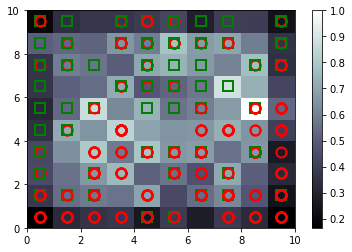

In [32]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T)
colorbar() #gives legend

markers = ['o', 's']                     # if the observation is fraud then red circular color or else green square
colors = ['r', 'g']
for i, r in enumerate(x):
    w = som.winner(r)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

- The markers used to distinguish frauds are:
    - Red Circular are Class 0 as fraud customers
    - Green Square are Class 1 as not fraud customers
- i is the index and r is the vector of each value and for each r first get the winning node
- The co-ordinates of the winning node are w[0] and w[1], 0.5 is added to center the marker
- s is a square and marker face color is the inside color of the marker


### 9. LVQ

In [33]:
# !pip install sklearn-lvq

not implemented!
classification accuracy: 0.9666666666666667


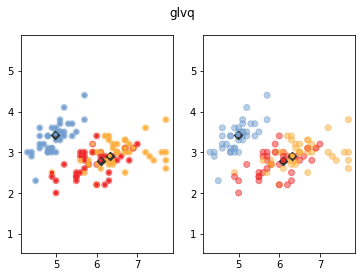

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn_lvq import GlvqModel
from sklearn_lvq.utils import plot2d

# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# store the feature matrix (x) and response vector (y)
x = iris.data
y = iris.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# nb_ppc = 100

# toy_data = np.append(
#     np.random.multivariate_normal([0, 0], np.eye(2) / 2, size=nb_ppc),
#     np.random.multivariate_normal([5, 0], np.eye(2) / 2, size=nb_ppc), axis=0)
# toy_label = np.append(np.zeros(nb_ppc), np.ones(nb_ppc), axis=0)

glvq = GlvqModel()
glvq.fit(x_train, y_train)
plot2d(glvq, x_train, y_train, 1, 'glvq')

print('classification accuracy:', glvq.score(x_test, y_test))
plt.show()

### 10. Convolutional Neural Networks

In [35]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt


In [36]:
#loading data
(X_train,Y_train) , (X_test,Y_test) = mnist.load_data()
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


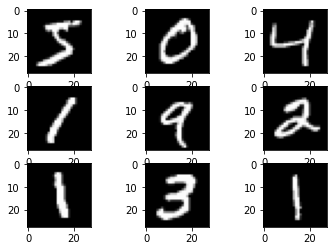

In [37]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [38]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 56s 21ms/step - loss: 0.1522 - accuracy: 0.9549
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0524 - accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0340 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0239 - accuracy: 0.9926
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0158 - accuracy: 0.9953
Epoch 6/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0120 - accuracy: 0.9961
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0088 - accuracy: 0.9970
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0068 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0055 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 37s 20m

In [39]:
#evaluting the model
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0576 - accuracy: 0.9863


[0.05763056129217148, 0.986299991607666]